In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from scipy.io import loadmat
import os
from PIL import Image

In [2]:
dataset, info = tfds.load("oxford_flowers102", with_info=True, as_supervised=True)

In [23]:
print(info.features["label"].names)
print(info.features['label'].num_classes)

['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia?', 'ca

water lily
desert-rose
gazania
wild pansy
oxeye daisy


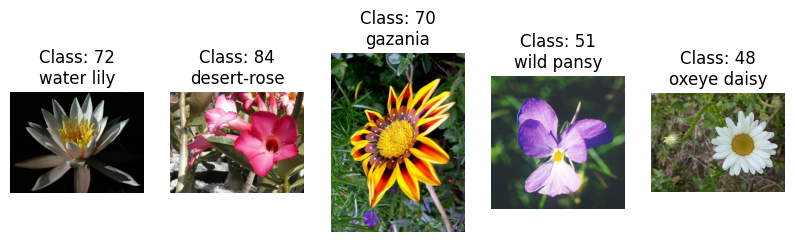

In [11]:
train_dataset = dataset["train"]

plt.figure(figsize=(10, 5))
for i, (image, label) in enumerate(train_dataset.take(5)): 
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.numpy())
    print(info.features["label"].names[label.numpy()])
    plt.title(f"Class: {label.numpy()}\n{info.features['label'].names[label.numpy()]}")
    plt.axis("off")

plt.show()

In [38]:
class_names = info.features["label"].names
label_mapping = {i: name for i, name in enumerate(class_names)}
all_labels = [(label.numpy(), label_mapping[label.numpy()]) for _, label in train_dataset]
unique_labels = {(label.numpy(), label_mapping[label.numpy()]) for _, label in train_dataset}
dataset = pd.DataFrame(sorted(unique_labels), columns=["Label Number", "Label Name"],index=None)
dataset.head()


,Label Number,Label Name
0,0,pink primrose
1,1,hard-leaved pocket orchid
2,2,canterbury bells
3,3,sweet pea
4,4,english marigold


In [39]:
dataset.to_csv('lables.csv',index=False)

In [10]:
data_set = loadmat("imagelabels.mat")
print(data_set.keys())

dict_keys(['__header__', '__version__', '__globals__', 'labels'])


In [30]:
LabeldataSet = data_set['labels'][0]
LabeldataSet

array([77, 77, 77, ..., 62, 62, 62], dtype=uint8)

0
1
2
3
4


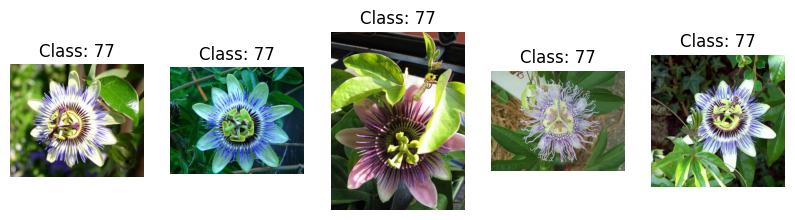

In [37]:
plt.figure(figsize=(10, 5))
for i, image in enumerate(os.listdir('102flowers')):
    print(i)
    plt.subplot(1, 5, i + 1)
    image_path = os.path.join('102flowers',image)
    imageForShow = Image.open(image_path)
    plt.imshow(imageForShow)
    plt.title(f"Class: {LabeldataSet[i]}")
    plt.axis("off")
    if(i == 4):
        break
    